# Figures for presentation

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt
import mapclassify
import pandas as pd
from matplotlib import cm

In [47]:
from matplotlib import rcParams

rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Lato"]

In [5]:
centres_df = pd.DataFrame(((50.08873, 14.41810), ), columns=['y', 'x'])
centres_df = gpd.GeoSeries(gpd.points_from_xy(centres_df['x'], centres_df['y'], crs='epsg:4236')).to_crs(epsg=3035)

In [7]:
prague = gpd.read_parquet('/data/uscuni-ulce/processed_data/chars/buildings_chars_69333.parquet')
prague = prague[prague.within(centres_df.buffer(3_500).iloc[0])]

In [30]:
primary = pd.read_parquet('/data/uscuni-ulce/data_product/data/primary_chars_69333.parquet')

In [31]:
primary

,sdbAre,sdbPer,sdbCoA,ssbCCo,ssbCor,ssbSqu,ssbERI,ssbElo,ssbCCM,ssbCCD,...,mibElo,mibERI,mibCCo,mibLAL,mibFR,mibSCo,micBAD,licBAD,misBAD,midBAD
-4242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,208.790015,209.215673,NaN,NaN
-4241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,201.959933,349.549459,NaN,NaN
-4240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,191.996473,343.889482,0.000000,NaN
-4239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,199.266220,405.939270,NaN,77.972974
-4238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,56.400397,334.250353,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446822,18.808939,18.500639,0.0,0.497522,4.0,0.281908,1.000161,0.483786,3.462293,0.006698,...,0.411406,1.002327,0.448064,32.928188,4.448825,4.448825,0.229979,375.277537,262.586086,90.207646
446823,20.175570,18.761721,0.0,0.538543,4.0,0.075115,0.999742,0.553808,3.451425,0.001870,...,0.188995,0.996211,0.229472,34.127736,2.638659,2.638659,508.502435,742.332821,231.441900,274.249781
446824,13.866140,14.948105,0.0,0.625960,4.0,0.156247,0.999969,0.845145,2.651838,0.003801,...,0.852422,1.010727,0.645340,5.510775,0.988196,0.988196,163.211969,405.444622,501.412662,594.756223
446825,33.743731,29.450456,0.0,0.284469,4.0,1.529599,0.972651,0.261972,6.110411,0.157801,...,0.274174,0.980486,0.299731,12.489400,1.220809,1.220809,116.037844,98.813961,163.218683,99.352656


In [36]:
prague['micBAD'] = primary.micBAD
prague['lcdMes'] = primary.lcdMes
prague['sisBpM'] = primary.sisBpM

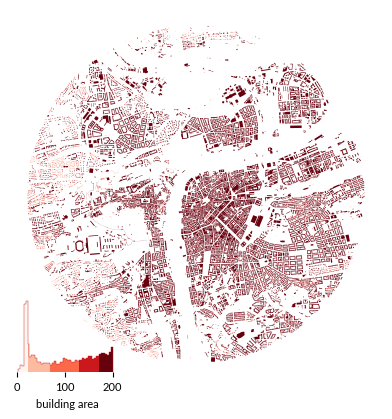

In [48]:
sdbare_legend = mapclassify.classify(
    prague.sdbAre[prague.sdbAre < 200], "quantiles", k=5
)

ax = prague.plot('sdbAre', scheme='userdefined', cmap='Reds', classification_kwds=dict(bins=sdbare_legend.bins))
sdbare_ax = sdbare_legend.plot_legendgram(ax=ax, cmap='Reds',  frameon=False)
sdbare_ax.hist(
    sdbare_legend.y, bins=50, color=cm.Reds(0.8), histtype="step", linewidth=0.3
)
sdbare_ax.tick_params(axis="x", which="both", labelsize=8)
sdbare_ax.set_xlabel("building area", fontsize=8)
sdbare_ax.set_xlim(0, sdbare_ax.get_xlim()[1])
sdbare_ax.spines["top"].set_visible(False)
sdbare_ax.spines["right"].set_visible(False)
sdbare_ax.spines["left"].set_visible(False)
sdbare_ax.spines["bottom"].set_linewidth(0.5)
ax.set_axis_off()


In [49]:
ltbibd_legend = mapclassify.classify(
    prague.ltbIBD[prague.ltbIBD < 60], "quantiles", k=5
)

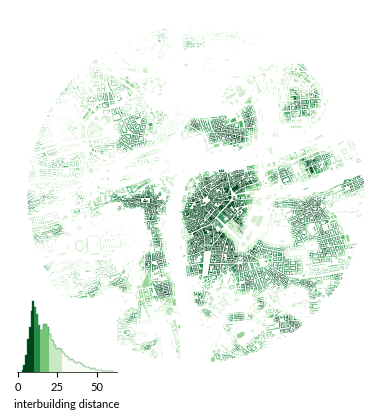

In [50]:
ax = prague.plot('ltbIBD', scheme='userdefined', cmap='Greens_r', classification_kwds=dict(bins=ltbibd_legend.bins))
ltbibd_ax = ltbibd_legend.plot_legendgram(ax=ax, cmap="Greens_r", frameon=True)
ltbibd_ax.hist(
    ltbibd_legend.y, bins=50, color=cm.Greens(0.8), histtype="step", linewidth=0.3
)
ltbibd_ax.tick_params(axis="x", which="both", labelsize=8)
ltbibd_ax.set_xlabel("interbuilding distance", fontsize=8)
ltbibd_ax.spines["top"].set_visible(False)
ltbibd_ax.spines["right"].set_visible(False)
ltbibd_ax.spines["left"].set_visible(False)
ltbibd_ax.spines["bottom"].set_linewidth(0.5)
ax.set_axis_off()


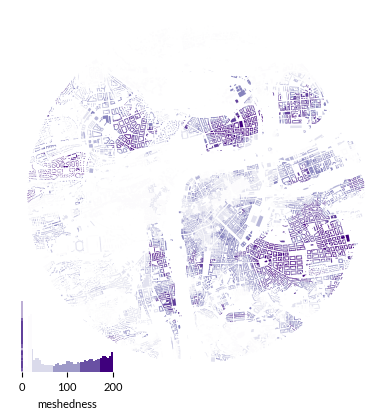

In [51]:
lcdmes_legend = mapclassify.classify(
    prague.lcdMes[(prague.lcdMes > 0) & (prague.lcdMes < 0.25)],
    "quantiles",
    k=5,
)

ax = prague.plot('lcdMes', scheme='userdefined', cmap='Purples', classification_kwds=dict(bins=lcdmes_legend.bins))
lcdmes_ax = sdbare_legend.plot_legendgram(ax=ax, cmap='Purples',  frameon=False)
lcdmes_ax.hist(
    lcdmes_legend.y, bins=50, color=cm.Purples(0.8), histtype="step", linewidth=0.3
)
lcdmes_ax.tick_params(axis="x", which="both", labelsize=8)
lcdmes_ax.set_xlabel("meshedness", fontsize=8)
lcdmes_ax.spines["top"].set_visible(False)
lcdmes_ax.spines["right"].set_visible(False)
lcdmes_ax.spines["left"].set_visible(False)
lcdmes_ax.spines["bottom"].set_linewidth(0.5)
ax.set_axis_off()


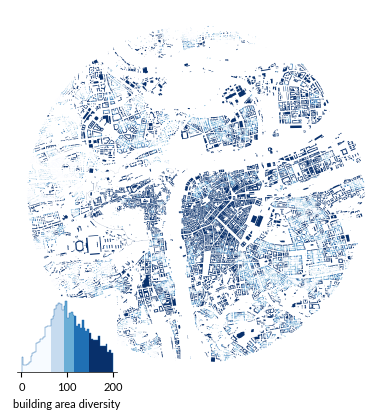

In [52]:
micbad_legend = mapclassify.classify(
    prague.micBAD[prague.micBAD < 200], "quantiles", k=5
)

ax = prague.plot('micBAD', scheme='userdefined', cmap='Blues', classification_kwds=dict(bins=micbad_legend.bins))
micbad_ax = micbad_legend.plot_legendgram(ax=ax, cmap="Blues", frameon=True)
micbad_ax.hist(
    micbad_legend.y, bins=50, color=cm.Blues(0.8), histtype="step", linewidth=0.3
)
micbad_ax.tick_params(axis="x", which="both", labelsize=8)
micbad_ax.set_xlabel("building area diversity", fontsize=8)
micbad_ax.spines["top"].set_visible(False)
micbad_ax.spines["right"].set_visible(False)
micbad_ax.spines["left"].set_visible(False)
micbad_ax.spines["bottom"].set_linewidth(0.5)
ax.set_axis_off()


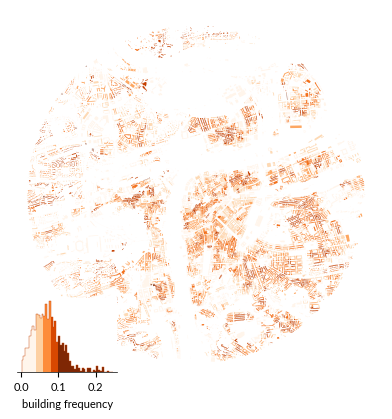

In [53]:
sisbpm_legend = mapclassify.classify(
    prague.sisBpM[prague.sisBpM < 0.25], "quantiles", k=5
)

ax = prague.plot('sisBpM', scheme='userdefined', cmap='Oranges', classification_kwds=dict(bins=sisbpm_legend.bins))
sisbpm_ax = sisbpm_legend.plot_legendgram(ax=ax, cmap="Oranges", frameon=True)
sisbpm_ax.hist(
    sisbpm_legend.y, bins=50, color=cm.Oranges(0.8), histtype="step", linewidth=0.3
)
sisbpm_ax.tick_params(axis="x", which="both", labelsize=8)
sisbpm_ax.set_xlabel("building frequency", fontsize=8)
sisbpm_ax.spines["top"].set_visible(False)
sisbpm_ax.spines["right"].set_visible(False)
sisbpm_ax.spines["left"].set_visible(False)
sisbpm_ax.spines["bottom"].set_linewidth(0.5)
ax.set_axis_off()
